In [166]:
import pandas as pd
import seaborn as sb

# Guardian Raids
Normal vs rested

In [167]:
gr_history = pd.read_csv('app/data/histories/gr.csv')
cd_aor_history = pd.read_csv('app/data/histories/cd_aor.csv')

In [168]:
gr_history

,timestamp,character,ilvl,boss,at_level,rested,first_time,red,blue,stones
0,2022-04-14-20:52:33,Jazzercist,1334,Armored Nacrasena,True,False,False,22,69,2
1,2022-04-15-09:45:28,Jazzercist,1340,Igrexion,True,False,True,54,171,7
2,2022-04-15-09:53:15,Jazzercist,1340,Igrexion,True,False,False,30,77,5
3,2022-04-15-11:31:46,Derplearning,1309,Armored Nacrasena,True,True,False,43,130,5
4,2022-04-15-11:39:16,Derplearning,1309,Armored Nacrasena,True,False,False,23,69,3
...,...,...,...,...,...,...,...,...,...,...
56,2022-05-02-10:14:13,Trif,1370,Night Fox Yoho,True,True,False,69,215,6
57,2022-05-02-10:55:12,Jazzercist,1367,Igrexion,True,True,False,56,169,9
58,2022-05-02-11:21:17,Jazzercist,1367,Igrexion,True,True,False,55,158,9
59,2022-05-02-13:07:50,Derplearning,1325,Armored Nacrasena,True,True,False,46,134,6


In [169]:
gr_df = (
    gr_history
    .query('stones > 0')
    .query('ilvl >= 1100')
    .query('first_time == False')
) 

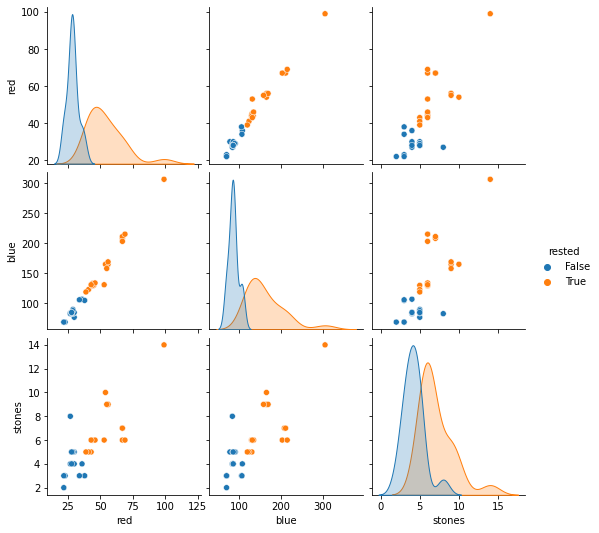

In [170]:
sb.pairplot(gr_df, vars=('red', 'blue', 'stones'), hue='rested')

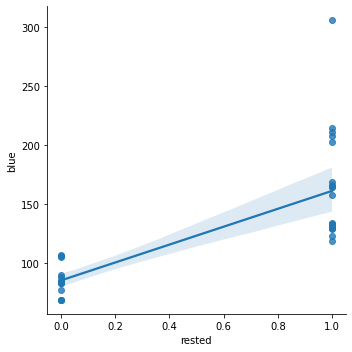

In [171]:
sb.lmplot(data=gr_df, x='rested', y='blue')


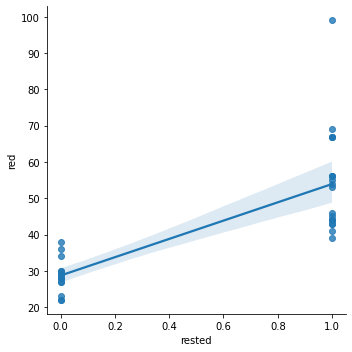

In [172]:
sb.lmplot(data=gr_df, x='rested', y='red')

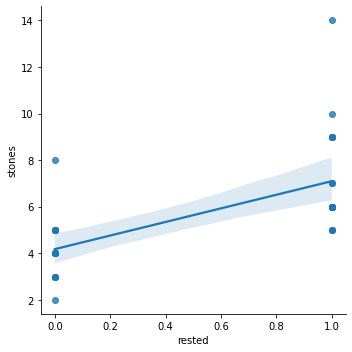

In [173]:
sb.lmplot(data=gr_df, x='rested', y='stones')

In [174]:
gr_df.groupby('rested')['red'].describe()

,count,mean,std,min,25%,50%,75%,max
rested,,,,,,,,
False,17.0,28.705882,4.341151,22.0,27.0,28.0,30.0,38.0
True,21.0,53.904762,14.056688,39.0,44.0,53.0,56.0,99.0


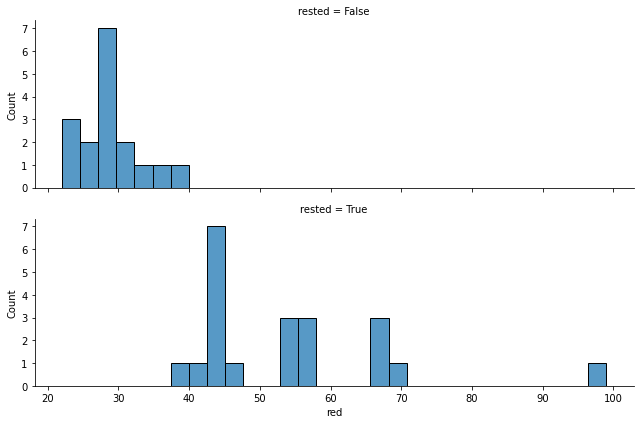

In [175]:
sb.displot(gr_df, x='red', row='rested', height=3, aspect=3, bins=30)

In [176]:
gr_df[gr_df.rested == True]['red'].mean() / gr_df[gr_df.rested == False]['red'].mean()

1.8778298204527712

In [177]:
gr_df.groupby('rested')['blue'].describe()

,count,mean,std,min,25%,50%,75%,max
rested,,,,,,,,
False,17.0,85.411765,11.731682,69.0,83.0,84.0,88.0,107.0
True,21.0,161.380952,45.690783,119.0,130.0,134.0,169.0,306.0


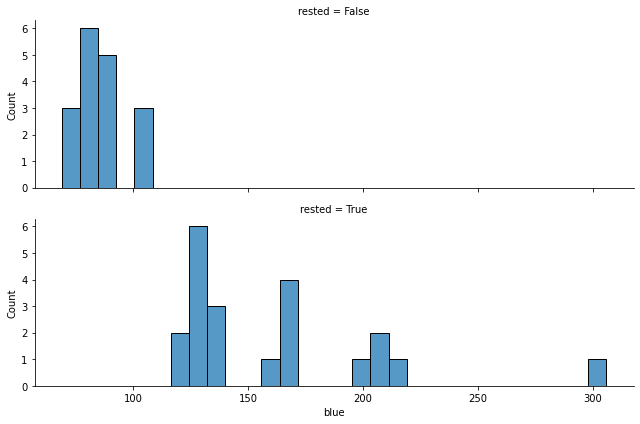

In [178]:
sb.displot(gr_df, x='blue', row='rested', height=3, aspect=3, bins=30)

In [179]:
gr_df[gr_df.rested == True]['blue'].mean() / gr_df[gr_df.rested == False]['blue'].mean()

1.889446412173685

In [180]:
gr_df.groupby('rested')['stones'].describe()

,count,mean,std,min,25%,50%,75%,max
rested,,,,,,,,
False,17.0,4.176471,1.333946,2.0,3.0,4.0,5.0,8.0
True,21.0,7.095238,2.188716,5.0,6.0,6.0,9.0,14.0


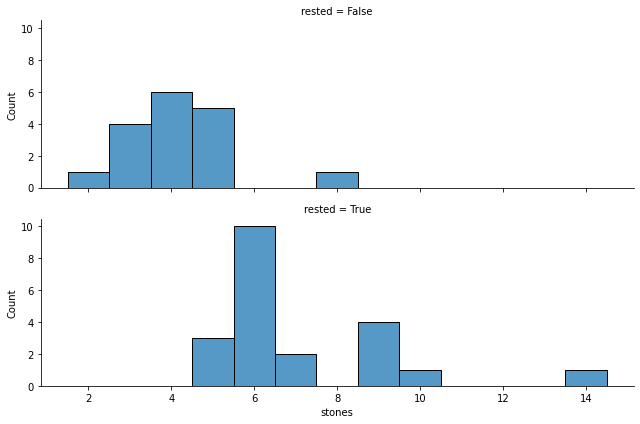

In [181]:
sb.displot(gr_df, x='stones', row='rested', height=3, aspect=3, discrete=True)

In [182]:
gr_df[gr_df.rested == True]['stones'].mean() / gr_df[gr_df.rested == False]['stones'].mean()

1.6988598256203888

# Chaos Dungeons
Normal vs rested rewards

In [183]:
cd_aor_history

,timestamp,character,ilvl,dungeon,at_level,rested,bonus_floor,red,blue,shards,stones
0,2022-04-14-20:28:10,Jazzercist,1334,Moon-1,True,False,None,42,105,1280,1
1,2022-04-15-08:55:54,Jazzercist,1334,Moon-1,True,False,None,40,163,1264,0
2,2022-04-15-09:05:30,Jazzercist,1334,Moon-1,True,False,None,37,157,1432,0
3,2022-04-15-11:15:00,Derplearning,1309,Star-1,True,True,None,56,227,1956,5
4,2022-04-15-11:22:03,Derplearning,1309,Star-1,True,False,None,29,110,984,2
...,...,...,...,...,...,...,...,...,...,...,...
63,2022-05-01-13:42:38,Kimjongchil,1316,Star-2,True,False,None,38,155,1274,1
64,2022-05-02-10:26:47,Jazzercist,1366,Moon-3,True,True,None,98,341,3351,3
65,2022-05-02-10:34:22,Jazzercist,1366,Moon-3,True,True,None,118,379,3606,9
66,2022-05-02-12:46:06,Derplearning,1325,Moon-1,True,True,None,71,260,2744,3


In [184]:
cd_df = (
    cd_aor_history
    .query('stones < 20')
    .query('shards > 0')
    .query('bonus_floor == "None"')
    .query('ilvl >= 1100')
    .drop(['at_level', 'ilvl'], axis=1)
)

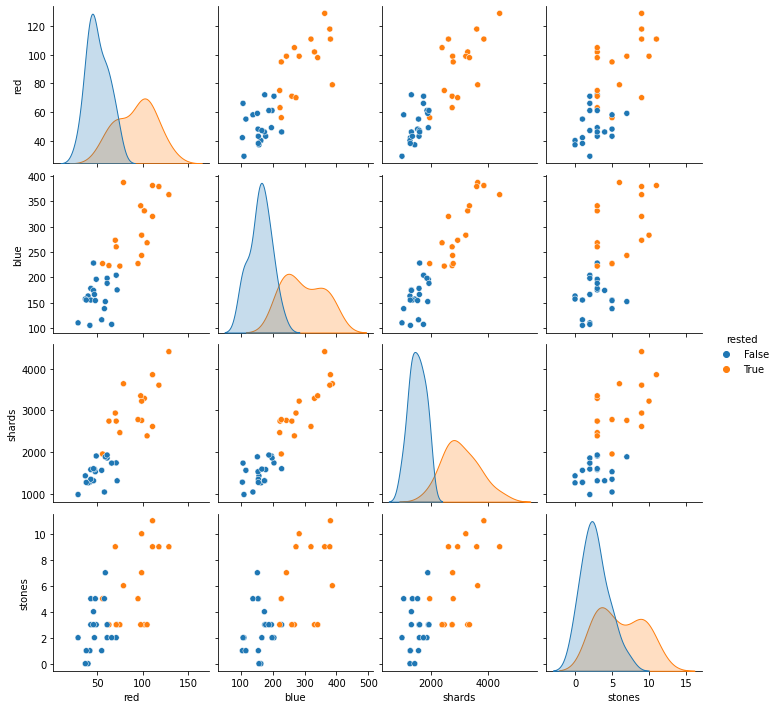

In [185]:
sb.pairplot(cd_df, vars=('red', 'blue', 'shards', 'stones'), hue='rested')

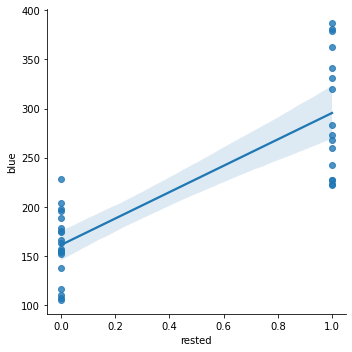

In [186]:
sb.lmplot(data=cd_df, x='rested', y='blue')


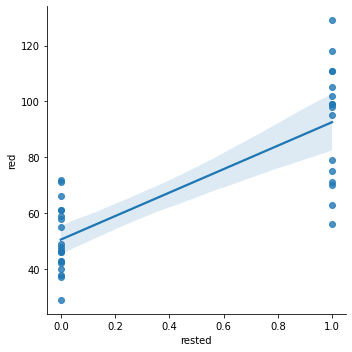

In [187]:
sb.lmplot(data=cd_df, x='rested', y='red')

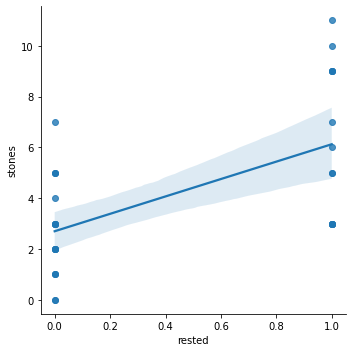

In [188]:
sb.lmplot(data=cd_df, x='rested', y='stones')

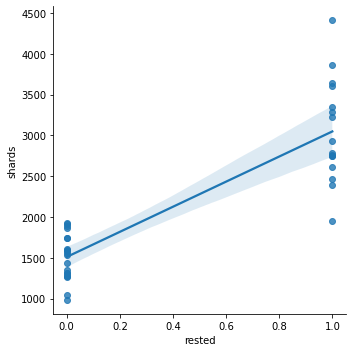

In [189]:
sb.lmplot(data=cd_df, x='rested', y='shards')

In [190]:
cd_df.groupby('rested')['red'].describe()

,count,mean,std,min,25%,50%,75%,max
rested,,,,,,,,
False,20.0,50.5500,11.807558,29.0,42.75,47.5,59.5,72.0
True,16.0,92.5625,21.124926,56.0,74.00,98.5,106.5,129.0


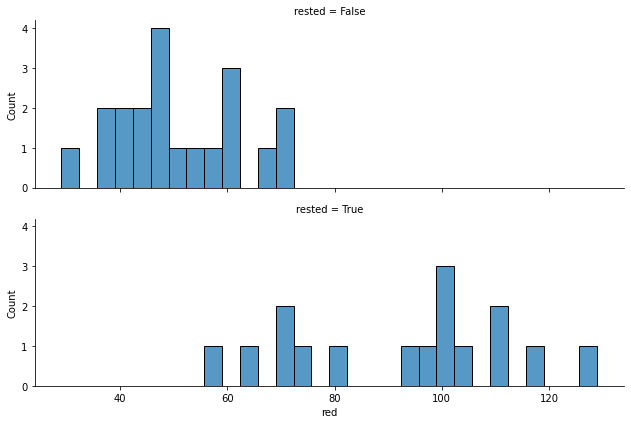

In [191]:
sb.displot(cd_df, x='red', row='rested', height=3, aspect=3, bins=30)

In [192]:
cd_df[cd_df.rested == True]['red'].mean() / cd_df[cd_df.rested == False]['red'].mean()

1.8311078140454997

In [193]:
cd_df.groupby('rested')['blue'].describe()

,count,mean,std,min,25%,50%,75%,max
rested,,,,,,,,
False,20.0,160.95,33.848696,105.0,148.5,160.0,180.5,228.0
True,16.0,295.50,61.438316,222.0,239.0,278.0,346.5,387.0


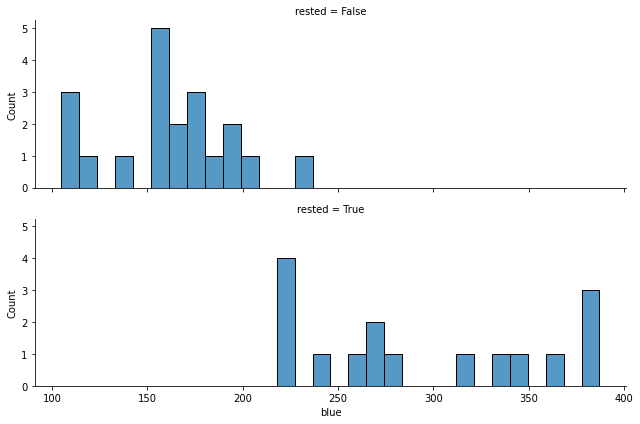

In [194]:
sb.displot(cd_df, x='blue', row='rested', height=3, aspect=3, bins=30)

In [195]:
cd_df[cd_df.rested == True]['blue'].mean() / cd_df[cd_df.rested == False]['blue'].mean()

1.8359739049394224

In [196]:
cd_df.groupby('rested')['stones'].describe()

,count,mean,std,min,25%,50%,75%,max
rested,,,,,,,,
False,20.0,2.700,1.809333,0.0,1.75,2.5,3.25,7.0
True,16.0,6.125,2.986079,3.0,3.00,5.5,9.00,11.0


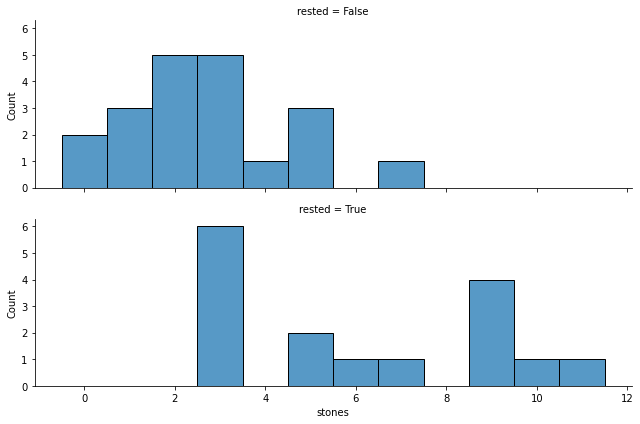

In [197]:
sb.displot(cd_df, x='stones', row='rested', height=3, aspect=3, discrete=True)

In [198]:
cd_df[cd_df.rested == True]['stones'].mean() / cd_df[cd_df.rested == False]['stones'].mean()

2.268518518518518

In [199]:
cd_df.groupby('rested')['shards'].describe()

,count,mean,std,min,25%,50%,75%,max
rested,,,,,,,,
False,20.0,1509.7500,281.207897,984.0,1304.75,1547.5,1738.25,1931.0
True,16.0,3048.3125,624.632022,1956.0,2711.75,2859.0,3414.75,4410.0


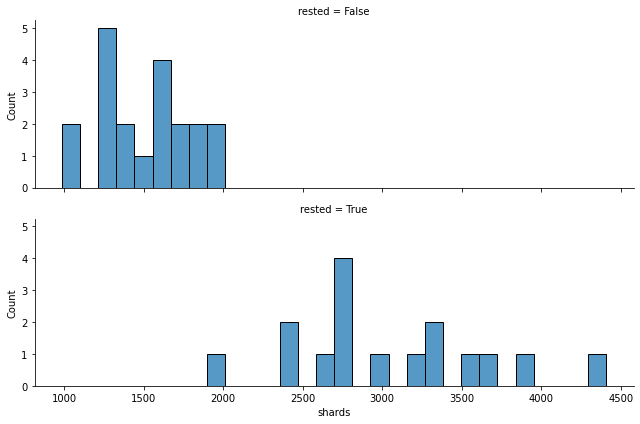

In [200]:
sb.displot(cd_df, x='shards', row='rested', height=3, aspect=3, bins=30)

In [201]:
cd_df[cd_df.rested == True]['shards'].mean() / cd_df[cd_df.rested == False]['shards'].mean()

2.019084285477728